In [1]:
import pandas as pd

# Load the dataset (adjust the path if needed)
df = pd.read_csv('consumer_complaints.csv')

# See first few rows
df.head()

# Check column names
df.columns


/tmp/ipython-input-908339741.py:4: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('consumer_complaints.csv')


Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [2]:
# Step 2: Keep only useful columns
df = df[['product', 'consumer_complaint_narrative']].dropna()
df.rename(columns={'product': 'Category', 'consumer_complaint_narrative': 'Complaint'}, inplace=True)
df.head()


,Category,Complaint
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [3]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['Cleaned_Complaint'] = df['Complaint'].apply(clean_text)
df.head()


,Category,Complaint,Cleaned_Complaint
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,xxxx has claimed i owe them for xxxx years des...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,in xxxxxxxx my wages that i earned at my job d...
190207,Mortgage,I have an open and current mortgage with Chase...,i have an open and current mortgage with chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,xxxx was submitted xxxxxxxx at the time i subm...


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Cleaned_Complaint']
y = df['Category']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8482263134261339
                         precision    recall  f1-score   support

Bank account or service       0.81      0.80      0.80      1155
          Consumer Loan       0.79      0.65      0.71       746
            Credit card       0.83      0.81      0.82      1615
       Credit reporting       0.85      0.85      0.85      2502
        Debt collection       0.82      0.89      0.85      3496
        Money transfers       0.82      0.53      0.64       150
               Mortgage       0.93      0.96      0.94      2941
Other financial service       0.00      0.00      0.00        21
            Payday loan       0.59      0.21      0.31       153
           Prepaid card       0.81      0.67      0.73       168
           Student loan       0.89      0.80      0.84       415

               accuracy                           0.85     13362
              macro avg       0.74      0.65      0.68     13362
           weighted avg       0.84      0.85      0.84     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
from textblob import TextBlob

# Compute sentiment polarity
df['Sentiment'] = df['Cleaned_Complaint'].apply(lambda x: TextBlob(x).sentiment.polarity)

df[['Complaint', 'Sentiment']].head()


,Complaint,Sentiment
190126,XXXX has claimed I owe them {$27.00} for XXXX ...,0.000000
190135,Due to inconsistencies in the amount owed that...,0.085000
190155,In XX/XX/XXXX my wages that I earned at my job...,-0.019294
190207,I have an open and current mortgage with Chase...,0.000000
190208,XXXX was submitted XX/XX/XXXX. At the time I s...,-0.051136


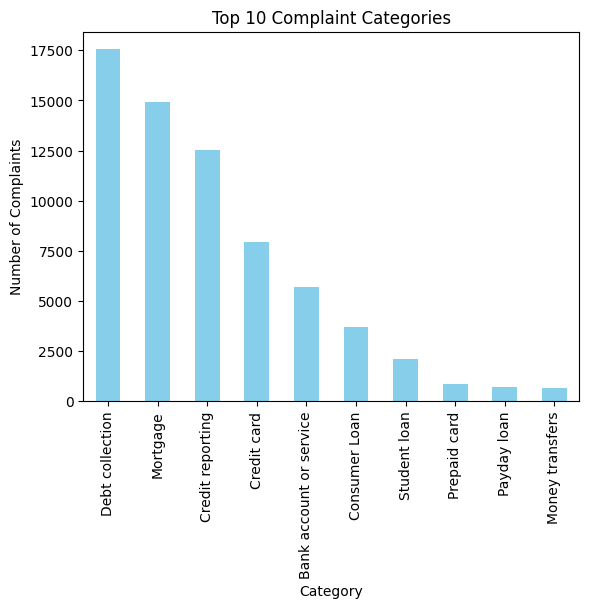

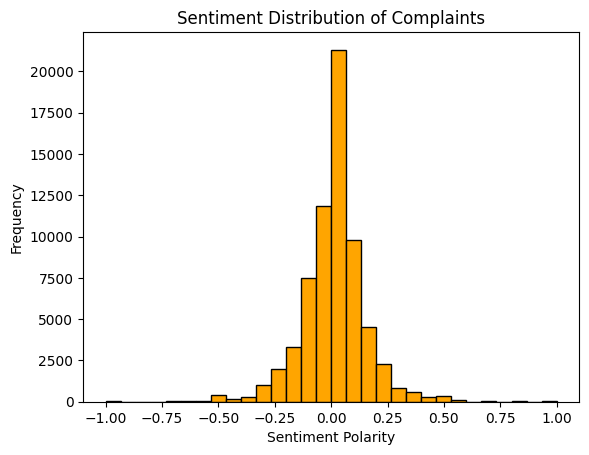

In [7]:
import matplotlib.pyplot as plt

# Bar chart of top 10 complaint categories
df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Complaint Categories')
plt.xlabel('Category')
plt.ylabel('Number of Complaints')
plt.show()

# Sentiment distribution
plt.hist(df['Sentiment'], bins=30, color='orange', edgecolor='black')
plt.title('Sentiment Distribution of Complaints')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
